<a href="https://colab.research.google.com/github/takaito1/EAS6305_F24/blob/main/week1/read_excel_from_BATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EAS4305/6305 read excel from BATS
The goal of this homework is to experience getting oceanographic dataset from a ocean time series station. This script helps with the first 2 steps of the HW1.

In [58]:
! pip install gsw

In [59]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import gsw
import pandas as pd

In [60]:
# Step 1 download data from BATS and create data vectors
# define headers first (since the excel sheet doesn't have one)
headers=['castid','dyear','date','lat','lon','pres','depth',
         'temperature','cond','salinity','DO','beam','fluo','PAR']
# read in the excel file
df=pd.read_excel('sample_data/b10331_ctd.xls',names=headers)
# display the overview of the contents of the excel sheet
df

,castid,dyear,date,lat,lon,pres,depth,temperature,cond,salinity,DO,beam,fluo,PAR
0,10331002,2016.946831,20161212,32.340767,64.593733,6,5.957368,21.586572,5.164972,36.680332,214.389597,0.442891,0.091892,178.098363
1,10331002,2016.946831,20161212,32.340767,64.593733,8,7.943637,21.587190,5.165100,36.680104,214.363203,0.442685,0.093883,146.975808
2,10331002,2016.946831,20161212,32.340767,64.593733,10,9.929642,21.587471,5.165239,36.680258,214.387684,0.442694,0.095130,124.969126
3,10331002,2016.946831,20161212,32.340767,64.593733,12,11.915647,21.587751,5.165378,36.680412,214.412165,0.442704,0.096377,102.962444
4,10331002,2016.946831,20161212,32.340767,64.593733,14,13.901856,21.588130,5.165469,36.680100,214.356475,0.442440,0.097961,93.945029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9474,10331017,2016.957256,20161216,31.978617,64.377817,1204,1192.162127,5.601566,3.460286,35.076543,223.434746,0.394602,0.022846,0.000493
9475,10331017,2016.957256,20161216,31.978617,64.377817,1206,1194.137209,5.599297,3.460209,35.077042,223.543457,0.394695,0.023517,0.000492
9476,10331017,2016.957256,20161216,31.978617,64.377817,1208,1196.111576,5.592080,3.459727,35.078075,223.945523,0.394700,0.021617,0.000492
9477,10331017,2016.957256,20161216,31.978617,64.377817,1210,1198.085631,5.591776,3.459910,35.079488,223.735999,0.394700,0.016633,0.000457


In [61]:
castid=df['castid'].to_numpy()
lat=df['lat'].to_numpy()
lon=df['lon'].to_numpy()*(-1) # longitude is in degree W so it should be negative
dep=df['depth'].to_numpy()
p=df['pres'].to_numpy()
t=df['temperature'].to_numpy()
sp=df['salinity'].to_numpy()

In [62]:
# Step 2 select cast2
ca=(castid == 10331002)
p2=p[ca] # p2 contains pressure from cast 2 only
t2=t[ca] # t2 contains temperature from cast 2
s2=sp[ca] # s2 contains practical salinity from cast 2

Text(0, 0.5, 'presssure, dbar')

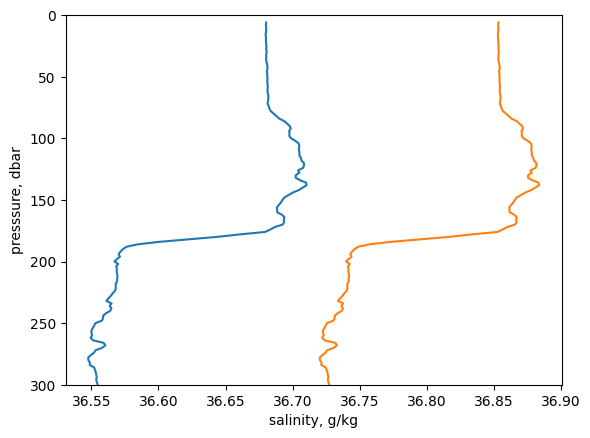

In [64]:
sa = gsw.SA_from_SP(s2,p2,lon[ca],lat[ca])
plt.plot(s2,p2,label='practical salinity')
plt.plot(sa,p2,label='absolute salinity')
plt.ylim(300,0)
plt.xlabel('salinity, g/kg')
plt.ylabel('presssure, dbar')